In [68]:
import sklearn
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt

In [69]:
games = pd.read_csv('./games.csv', ';')
#print(games.head(5))
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50286 entries, 0 to 50285
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        50286 non-null  int64
 1   firstBlood          50286 non-null  int64
 2   firstTower          50286 non-null  int64
 3   firstInhibitor      50286 non-null  int64
 4   firstBaron          50286 non-null  int64
 5   firstDragon         50286 non-null  int64
 6   firstRiftHerald     50286 non-null  int64
 7   t1_towerKills       50286 non-null  int64
 8   t1_inhibitorKills   50286 non-null  int64
 9   t1_baronKills       50286 non-null  int64
 10  t1_dragonKills      50286 non-null  int64
 11  t1_riftHeraldKills  50286 non-null  int64
 12  t2_towerKills       50286 non-null  int64
 13  t2_inhibitorKills   50286 non-null  int64
 14  t2_baronKills       50286 non-null  int64
 15  t2_dragonKills      50286 non-null  int64
 16  t2_riftHeraldKills  50286 non-null  int6

/home/diegoflm/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [70]:
# Cuantitative variables (integer)
games.select_dtypes(include=['int64']).describe()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
count,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000
mean,1871.386032,1.487233,1.485125,1.339578,0.948693,1.477270,0.749195,5.835163,1.041781,0.381200,1.420356,0.257487,5.681999,1.008611,0.424472,1.437975,0.245854,1.493776
std,450.876052,0.499842,0.500499,0.652960,0.838988,0.530346,0.824393,3.740575,1.269064,0.588001,1.201740,0.437254,3.809336,1.261867,0.617672,1.219412,0.430597,0.499966
min,610.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1554.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2156.750000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000,2.000000
max,4728.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000,2.000000


# Split training data from test data: 80% for training, 20% for testing.

In [71]:
from sklearn.model_selection import train_test_split
N=len(games)
cTrain=int(N*0.8) # 80% for training and 20% for testing
cTest=N-cTrain
print(N,cTrain,cTest)
train_data, test_data = sklearn.model_selection.train_test_split(games, train_size=cTrain, test_size=cTest)

50286 40228 10058


In [72]:
#train_data.shape
train_data.head()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
22039,1674,2,2,2,2,1,1,3,0,0,3,1,6,1,1,0,0,2
17936,2212,2,1,2,2,2,0,6,0,0,1,0,5,1,1,2,0,2
46845,1883,1,1,2,1,2,2,7,1,1,0,0,6,1,0,3,1,1
38750,1810,1,1,1,1,1,0,9,1,1,3,0,1,0,0,0,0,1
8241,1799,1,1,1,1,2,1,10,2,1,2,1,0,0,0,1,0,1


# Pipeline for categorical attributes

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [74]:
#6 categorical attributes, where the numeric values don't have a numerical meaning.
cat_atts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False))
    ])

# Pipeline for numeric attributes

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [76]:
#11 numeric attributes
num_atts = ['gameDuration', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 
        't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 
        't2_riftHeraldKills']

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())    #Standarization by centering and scaling.
    ])

# Pipeline completo

In [77]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_atts),
    ("cat", cat_pipeline, cat_atts), 
])

In [78]:
X_train = full_pipeline.fit_transform(train_data)

In [79]:
X_train.shape

(40228, 28)

In [80]:
X_train[0,:]

array([-0.43738233, -0.75963507, -0.82231913, -0.6488879 ,  1.30949283,
        1.69562866,  0.08305272, -0.00720639,  0.93075922, -1.1794071 ,
       -0.57061419,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ])

In [81]:
y_train = train_data["winner"]
y_train

22039    2
17936    2
46845    1
38750    1
8241     1
        ..
24591    2
23922    2
28666    1
26408    2
10798    2
Name: winner, Length: 40228, dtype: int64

# Neuronal network training models

In [82]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [83]:
model1 = MLPClassifier(activation='identity',solver='lbfgs', alpha=1e-5,
    hidden_layer_sizes=(4,7), random_state=123)

model1.fit(X_train, y_train)
scores1 = cross_val_score(model1, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores1)
scores1.mean()

[-0.02858563 -0.02672135 -0.02609993 -0.02734618 -0.02548167]


-0.02684695072939053

In [84]:
modelo2 = MLPClassifier(activation='relu',solver='sgd', alpha=1e-5,hidden_layer_sizes=(3, 3, 3, 3), random_state=123)
modelo2.fit(X_train, y_train)
scores2 = cross_val_score(modelo2, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores2)
scores2.mean()

/home/diegoflm/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diegoflm/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diegoflm/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diegoflm/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[-0.02709421 -0.02696992 -0.02150137 -0.02672467 -0.02249845]


/home/diegoflm/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.024957723666914004

In [85]:
model3 = MLPClassifier(activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 5, 5, 5, 5), random_state=123)
model3.fit(X_train, y_train)
scores3 = cross_val_score(model3, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores3)
scores3.mean()

[-0.02174994 -0.02025851 -0.01851852 -0.01963953 -0.01889372]


-0.01981204407781422

In [86]:
model4 = MLPClassifier(activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(4, 10, 3), random_state=123)
model4.fit(X_train, y_train)
scores4 = cross_val_score(model4, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores4)
scores4.mean()

[-0.02286851 -0.01976137 -0.02063137 -0.02262275 -0.02050963]


-0.02127872563709571

In [127]:
model5 = MLPClassifier(activation='tanh',solver='sgd', alpha=1e-5,hidden_layer_sizes=(1), random_state=123)
model5.fit(X_train, y_train)
scores5 = cross_val_score(model5, X_train, y_train, cv=5, scoring='neg_mean_absolute_error') #neg_mean_absolute_error
print(scores5)
scores5.mean()

[-0.02771564 -0.02672135 -0.02510564 -0.02809198 -0.02585457]


-0.02669783610615592

# On the test set:

In [88]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-0.44623952,  0.57755773, -0.03437511, ...,  0.        ,
         0.        ,  1.        ],
       [-0.27352425,  1.11243485,  0.75356892, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.40048532,  1.37987341,  1.54151294, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.60198647, -0.22475795, -0.82231913, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.39519386, -0.49219651, -0.82231913, ...,  0.        ,
         1.        ,  0.        ],
       [-0.50381128,  0.04268061, -0.03437511, ...,  1.        ,
         0.        ,  0.        ]])

In [89]:
y_pred1 = model1.predict(X_test)  
y_pred1

array([1, 1, 1, ..., 2, 2, 1])

In [90]:
y_pred2 = modelo2.predict(X_test)  
y_pred2

array([1, 1, 1, ..., 2, 2, 1])

In [91]:
y_pred3 = model3.predict(X_test)  
y_pred3

array([1, 1, 1, ..., 2, 2, 1])

In [92]:
y_pred4 = model4.predict(X_test)  
y_pred4

array([1, 1, 1, ..., 2, 2, 1])

In [93]:
y_pred5 = model5.predict(X_test)  
y_pred5

array([1, 1, 1, ..., 2, 2, 1])

In [94]:
y_test = test_data["winner"]

# Results

In [95]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred1
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.02744084310996222


In [96]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred2
       )
print(f"Mean Absolute Error for model2: {mae}")

Mean Absolute Error for model2: 0.026347186319347782


In [97]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred3
       )
print(f"Mean Absolute Error for model3: {mae}")

Mean Absolute Error for model3: 0.02117717240007954


In [98]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred4
       )
print(f"Mean Absolute Error for model4: {mae}")

Mean Absolute Error for model4: 0.022370252535295287


In [99]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred5
       )
print(f"Mean Absolute Error for model5: {mae}")

Mean Absolute Error for model5: 0.027341419765360905


In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.9725591568900378

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.9736528136806523

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.9788228275999205

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4)

0.9776297474647048

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred5)

0.9726585802346391

In [105]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

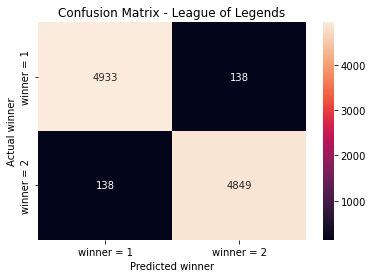

In [106]:
%matplotlib inline
confusion_matrix1 = confusion_matrix(y_test, y_pred1)

ax = plt.subplot()
sns.heatmap(confusion_matrix1, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

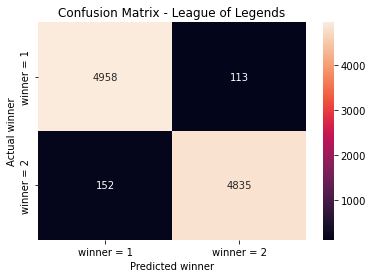

In [107]:
%matplotlib inline
confusion_matrix2 = confusion_matrix(y_test, y_pred2)

ax = plt.subplot()
sns.heatmap(confusion_matrix2, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

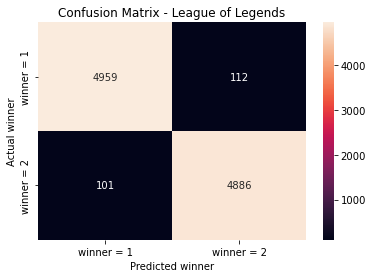

In [108]:
%matplotlib inline
confusion_matrix3 = confusion_matrix(y_test, y_pred3)

ax = plt.subplot()
sns.heatmap(confusion_matrix3, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

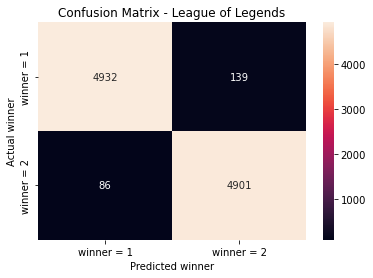

In [109]:
%matplotlib inline
confusion_matrix4 = confusion_matrix(y_test, y_pred4)

ax = plt.subplot()
sns.heatmap(confusion_matrix4, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

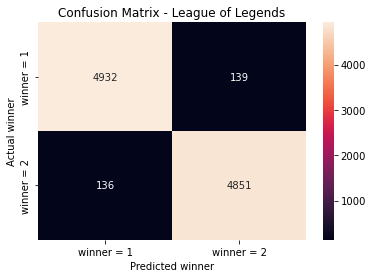

In [110]:
%matplotlib inline
confusion_matrix5 = confusion_matrix(y_test, y_pred5)

ax = plt.subplot()
sns.heatmap(confusion_matrix5, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

# Summary

In [111]:
#Accuracy & Confusion Matrix

from tabulate import tabulate
mydata = [
    ['Model', 'Accuracy', 'Confusion Matrix'],
      ['model1', accuracy_score(y_test, y_pred1), confusion_matrix1],
      ['model2', accuracy_score(y_test, y_pred2), confusion_matrix2],
      ['model3', accuracy_score(y_test, y_pred3), confusion_matrix3],
      ['model4', accuracy_score(y_test, y_pred4), confusion_matrix4],
      ['model5', accuracy_score(y_test, y_pred5), confusion_matrix5],
]
print(tabulate(mydata, tablefmt="grid"))

+--------+--------------------+------------------+
| Model  | Accuracy           | Confusion Matrix |
+--------+--------------------+------------------+
| model1 | 0.9725591568900378 | [[4933  138]     |
|        |                    |  [ 138 4849]]    |
+--------+--------------------+------------------+
| model2 | 0.9736528136806523 | [[4958  113]     |
|        |                    |  [ 152 4835]]    |
+--------+--------------------+------------------+
| model3 | 0.9788228275999205 | [[4959  112]     |
|        |                    |  [ 101 4886]]    |
+--------+--------------------+------------------+
| model4 | 0.9776297474647048 | [[4932  139]     |
|        |                    |  [  86 4901]]    |
+--------+--------------------+------------------+
| model5 | 0.9726585802346391 | [[4932  139]     |
|        |                    |  [ 136 4851]]    |
+--------+--------------------+------------------+


# Best model so far: model3

After several executions of the entire notebook, model3 is consistently the best:  
  
model3 = MLPClassifier( \
&emsp;    activation='tanh', \
&emsp;    solver='adam', \
&emsp;    alpha=1e-5, \
&emsp;    hidden_layer_sizes=(5, 5, 5, 5, 5), \
&emsp;    random_state=123) \
\
model3.fit(X_train, y_train) \
scores3 = cross_val_score( \
&emsp;    model3, \
&emsp;    X_train, \
&emsp;    y_train, \
&emsp;    cv=5, \
&emsp;    scoring='neg_mean_absolute_error') 
    

# Hyper-parameter variation

In [112]:
model3B = MLPClassifier(activation = 'tanh',solver = 'adam', alpha = 1e-5,hidden_layer_sizes = (5, 5, 5, 5, 5), random_state = 123
    , n_iter_no_change = 15) #Variation
model3B.fit(X_train, y_train)
scores3B = cross_val_score(model3B, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores3B)
scores3B.mean()

[-0.02212279 -0.02013423 -0.01901566 -0.01963953 -0.01802362]


-0.019787165377698496

In [113]:
model3C = MLPClassifier(activation = 'tanh',solver = 'adam', alpha = 1e-5,hidden_layer_sizes = (5, 5, 5, 5, 5), random_state = 123
    , n_iter_no_change = 20) #Variation
model3C.fit(X_train, y_train)
scores3C = cross_val_score(model3C, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(scores3C)
scores3C.mean()

[-0.02237136 -0.01889137 -0.01789709 -0.01914232 -0.01789932]


-0.019240294348515305

In [114]:
y_pred3B = model3B.predict(X_test)  
y_pred3B

array([1, 1, 1, ..., 2, 2, 1])

In [115]:
y_pred3C = model3C.predict(X_test)  
y_pred3C

array([1, 1, 1, ..., 2, 2, 1])

In [116]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred3B
       )
print(f"Mean Absolute Error for model3B: {mae}")

Mean Absolute Error for model3B: 0.021475442433883475


In [117]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred3C
       )
print(f"Mean Absolute Error for model3C: {mae}")

Mean Absolute Error for model3C: 0.019785245575661164


In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3B)

0.9785245575661166

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3C)

0.9802147544243388

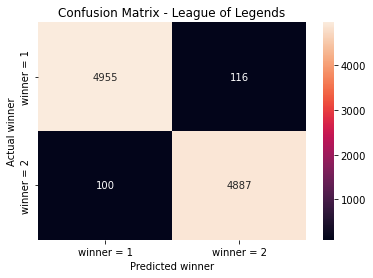

In [120]:
%matplotlib inline
confusion_matrix3b = confusion_matrix(y_test, y_pred3B)

ax = plt.subplot()
sns.heatmap(confusion_matrix3b, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

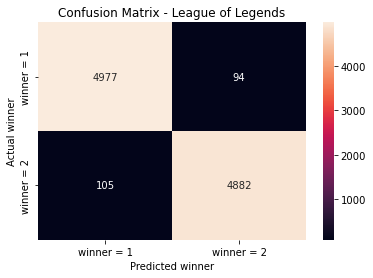

In [121]:
%matplotlib inline
confusion_matrix3C = confusion_matrix(y_test, y_pred3C)

ax = plt.subplot()
sns.heatmap(confusion_matrix3C, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted winner')
ax.set_ylabel('Actual winner') 
ax.set_title('Confusion Matrix - League of Legends') 
ax.xaxis.set_ticklabels(['winner = 1', 'winner = 2'])
ax.yaxis.set_ticklabels(['winner = 1', 'winner = 2']);
plt.show();

# Comparison

In [122]:
from tabulate import tabulate
mydata = [
    ['Model', 'n_iter_no_change', 'Accuracy', 'Confusion Matrix'],
      ['model3', 10, accuracy_score(y_test, y_pred3), confusion_matrix3],
      ['model3B', 15, accuracy_score(y_test, y_pred3B), confusion_matrix3B],
      ['model3C', 20, accuracy_score(y_test, y_pred3C), confusion_matrix3C]
]
print(tabulate(mydata, tablefmt="grid"))

+---------+------------------+--------------------+------------------+
| Model   | n_iter_no_change | Accuracy           | Confusion Matrix |
+---------+------------------+--------------------+------------------+
| model3  | 10               | 0.9788228275999205 | [[4959  112]     |
|         |                  |                    |  [ 101 4886]]    |
+---------+------------------+--------------------+------------------+
| model3B | 15               | 0.9785245575661166 | [[4991  114]     |
|         |                  |                    |  [  71 4882]]    |
+---------+------------------+--------------------+------------------+
| model3C | 20               | 0.9802147544243388 | [[4977   94]     |
|         |                  |                    |  [ 105 4882]]    |
+---------+------------------+--------------------+------------------+


# Analysis
For the model3, two variations for an hyper-parameter were done. The chosen parameter was n_iter_no_change.  
The default value for this parameter (the value for model3) is: 10  
The description for this hyper-parameter is:
"Maximum number of epochs to not meet tol improvement.  
Only effective when solver=’sgd’ or ‘adam’."  

A greater value for this parameter leads to a greater amount of epochs, which could mean a better performance.  
The results show that a bigger value for n_iter_no_change than 10 tends to improve the accuracy,  
but the value with the better performance is n_iter_no_change = 20.

In any case, with either a value of 15 or 20, the accuracies are similar, and after repeated  
executions of the entire notebook, usually at least one of the models with either a value of 15 or 20,  
is better than the accuracy oibtained with de default value of 10.